https://deepctr-doc.readthedocs.io/en/latest/Examples.html#regression-movielens

In [1]:
import os

DIR_DATA = os.path.join(os.environ["HOME"], "workspace/third_party/shenweichen/DeepCTR/examples")

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr.models import DeepFM
from deepctr.feature_column import SparseFeat, get_feature_names

In [3]:
data = pd.read_csv(os.path.join(DIR_DATA, "movielens_sample.txt"))
sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ['rating']

In [4]:
# 1.Label Encoding for sparse features,and do simple Transformation for dense features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])

In [5]:
# 2.count #unique features for each sparse field
fixlen_feature_columns = [
    SparseFeat(feat, data[feat].max() + 1, embedding_dim=4)
    for feat in sparse_features
]

In [6]:
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns

In [7]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [8]:
# 3.generate input data for model
train, test = train_test_split(data, test_size=0.2, random_state=2020)

train_model_input = {name: train[name].values for name in feature_names}
test_model_input = {name: test[name].values for name in feature_names}

In [38]:
# 4.Define Model,train,predict and evaluate
model = DeepFM(
    linear_feature_columns,
    dnn_feature_columns,
    task='regression'
)

In [39]:
model.compile(
    "adam",
    loss="mse",
    metrics=['mse']
)

In [40]:
history = model.fit(
    train_model_input,
    train[target].values,
    batch_size=256,
    epochs=80,
    verbose=2,
    validation_split=0.2
)

Epoch 1/80
1/1 - 2s - loss: 13.4141 - mse: 13.4141 - val_loss: 15.6735 - val_mse: 15.6735
Epoch 2/80
1/1 - 0s - loss: 13.2663 - mse: 13.2663 - val_loss: 15.5199 - val_mse: 15.5199
Epoch 3/80
1/1 - 0s - loss: 13.1033 - mse: 13.1033 - val_loss: 15.3506 - val_mse: 15.3506
Epoch 4/80
1/1 - 0s - loss: 12.9248 - mse: 12.9248 - val_loss: 15.1661 - val_mse: 15.1661
Epoch 5/80
1/1 - 0s - loss: 12.7306 - mse: 12.7306 - val_loss: 14.9643 - val_mse: 14.9643
Epoch 6/80
1/1 - 0s - loss: 12.5185 - mse: 12.5185 - val_loss: 14.7417 - val_mse: 14.7417
Epoch 7/80
1/1 - 0s - loss: 12.2856 - mse: 12.2856 - val_loss: 14.4964 - val_mse: 14.4964
Epoch 8/80
1/1 - 0s - loss: 12.0306 - mse: 12.0306 - val_loss: 14.2283 - val_mse: 14.2283
Epoch 9/80
1/1 - 0s - loss: 11.7513 - mse: 11.7513 - val_loss: 13.9339 - val_mse: 13.9339
Epoch 10/80
1/1 - 0s - loss: 11.4446 - mse: 11.4446 - val_loss: 13.6107 - val_mse: 13.6107
Epoch 11/80
1/1 - 0s - loss: 11.1078 - mse: 11.1078 - val_loss: 13.2562 - val_mse: 13.2562
Epoch 12

In [41]:
pred_ans = model.predict(
    test_model_input,
    batch_size=256
)

In [42]:
print("test MSE", round(mean_squared_error(test[target].values, pred_ans), 4))

test MSE 2.5587


In [43]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'MSE'}>

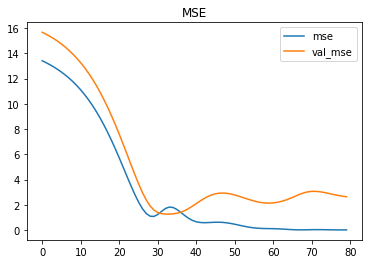

In [44]:
history_df.loc[:, ['mse', 'val_mse']].plot(title="MSE")